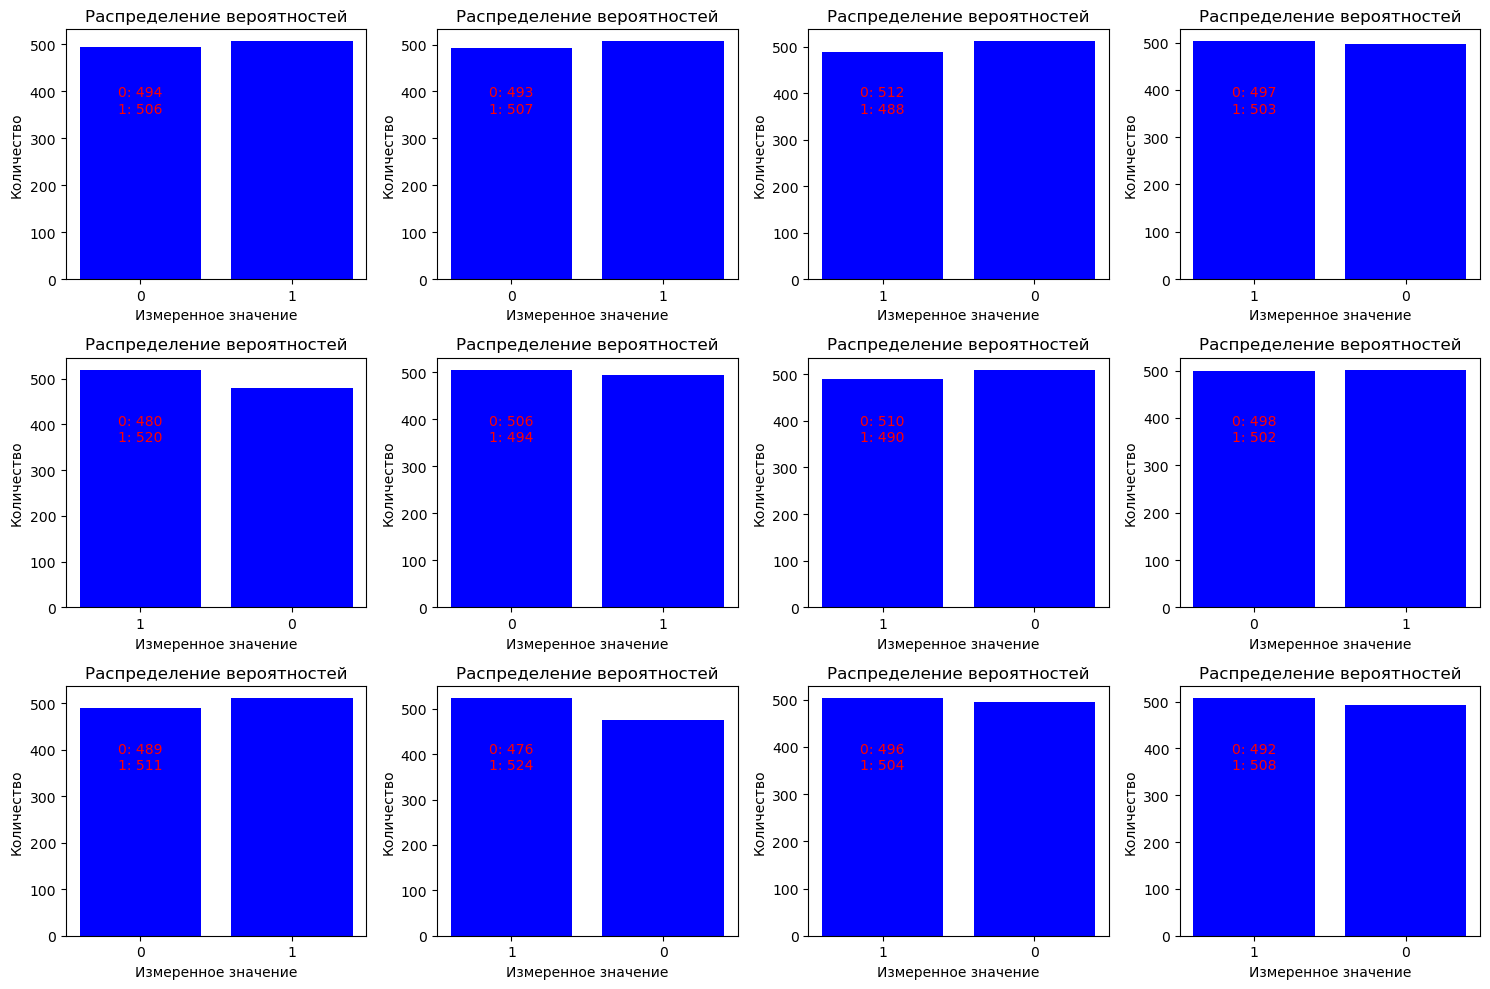

In [4]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
import matplotlib.pyplot as plt

# Создаем симулятор
simulator = Aer.get_backend('aer_simulator')

# Создаем фигуру с 12 подграфиками (3 строки по 4 графика)
fig, axs = plt.subplots(3, 4, figsize=(15, 10))

for ax in axs.flatten():
    # Создаем квантовую схему с 1 кубитом и 1 классическим битом
    qc = QuantumCircuit(1, 1)
    qc.h(0)
    qc.x(0)
    qc.measure(0, 0)
    
    # Копируем и декомпозируем схему для надежности
    qc = qc.copy().decompose()
    
    # Выполняем симуляцию
    job = simulator.run(qc, shots=1000)
    result = job.result()
    counts = result.get_counts()
    
    # Строим бар-график распределения
    ax.bar(counts.keys(), counts.values(), color='blue')
    ax.set_xlabel("Измеренное значение")
    ax.set_ylabel("Количество")
    ax.set_title("Распределение вероятностей")
    
    # Добавляем текст с количеством 0 и 1
    text = f"0: {counts.get('0', 0)}\n1: {counts.get('1', 0)}"
    ax.text(0, max(counts.values())*0.7, text, transform=ax.transData,
            ha='center', color='red', fontsize=10)

plt.tight_layout()
plt.show()


Фаза 1.57 рад, вектор состояния: Statevector([0.5-0.5j, 0.5+0.5j],
            dims=(2,))
Фаза 3.14 рад, вектор состояния: Statevector([-1.29893408e-16-0.70710678j,  4.32978028e-17+0.70710678j],
            dims=(2,))
Фаза 4.71 рад, вектор состояния: Statevector([-0.5-0.5j, -0.5+0.5j],
            dims=(2,))


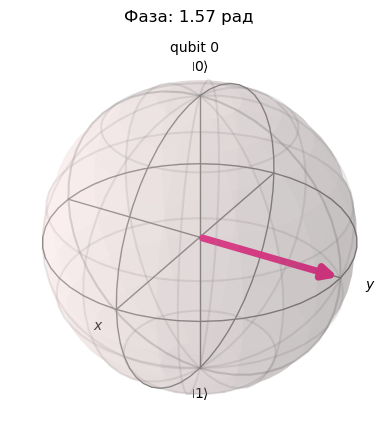

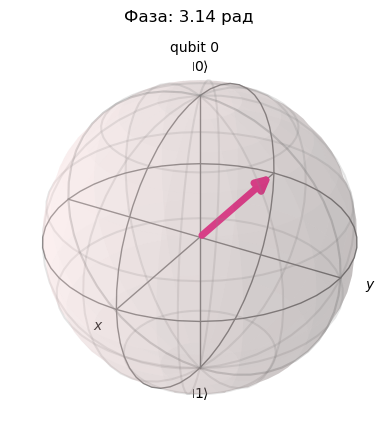

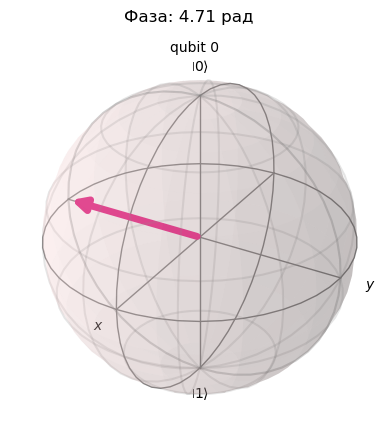

In [39]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_bloch_multivector
from qiskit_aer import Aer
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Создаем симулятор состояния
simulator = Aer.get_backend('statevector_simulator')

# Создаем квантовую схему с 1 кубитом
qc = QuantumCircuit(1)

# Применяем H-гейт, чтобы создать суперпозицию (|0> + |1>)/sqrt(2)
qc.h(0)

# Применяем фазовые сдвиги: Rz(pi/2), Rz(pi), Rz(3pi/2)
phases = [np.pi / 2, np.pi, 3 * np.pi / 2]
bloch_vectors = []

for phase in phases:
    qc_copy = qc.copy()
    qc_copy.rz(phase, 0)  # Фазовый сдвиг на кубите
    
    # Транспиляция схемы для симулятора
    transpiled_qc = transpile(qc_copy, simulator)
    
    # Запуск симуляции
    job = simulator.run(transpiled_qc)
    result = job.result()
    
    # Получаем вектор состояния
    statevector = result.get_statevector()
    bloch_vectors.append(statevector)

# Проверяем корректность векторов состояния
for i, state in enumerate(bloch_vectors):
    print(f"Фаза {phases[i]:.2f} рад, вектор состояния: {state}")

# Визуализируем состояния на Блоховой сфере
for i, state in enumerate(bloch_vectors):
    fig = plot_bloch_multivector(state)
    fig.suptitle(f"Фаза: {phases[i]:.2f} рад")  # Добавляем заголовок
    plt.show()


In [40]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_vector
from qiskit_aer import Aer

# Создаем симулятор состояния
simulator = Aer.get_backend('statevector_simulator')

# Создаем квантовую схему с 1 кубитом
qc = QuantumCircuit(1)
qc.h(0)  # Создаем суперпозицию (|0> + |1>)/sqrt(2)

# Фазовые сдвиги от 0 до 2π
num_frames = 60
phases = np.linspace(0, 2 * np.pi, num_frames)

# Подготовка графика
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
ax.view_init(elev=30, azim=30)  # Угол обзора

# Функция для вычисления координат Блохового вектора
def get_bloch_vector(statevector):
    """Преобразует вектор состояния в координаты Блоховой сферы (x, y, z)."""
    rho = statevector.to_operator().data  # Преобразуем в матрицу плотности
    x = np.real(rho[0, 1] + rho[1, 0])
    y = np.imag(rho[0, 1] - rho[1, 0])
    z = np.real(rho[0, 0] - rho[1, 1])
    return [x, y, z]

# Функция для обновления анимации
def update(frame):
    ax.clear()
    phase = phases[frame]
    
    # Копируем схему и применяем фазовый сдвиг
    qc_copy = qc.copy()
    qc_copy.rz(phase, 0)
    
    # Симуляция квантового состояния
    transpiled_qc = transpile(qc_copy, simulator)
    job = simulator.run(transpiled_qc)
    result = job.result()
    statevector = Statevector(result.get_statevector())

    # Вычисляем Блохов вектор
    bloch_vector = get_bloch_vector(statevector)
    
    # Рисуем Блохову сферу
    plot_bloch_vector(bloch_vector, ax=ax)
    ax.set_title(f"Фазовый сдвиг: {phase:.2f} рад")

# Создаем анимацию
ani = animation.FuncAnimation(fig, update, frames=num_frames, interval=50)

# Сохранение анимации в файл
animation_path = "../bloch_sphere_animation.gif"
ani.save(animation_path, writer='pillow', fps=30)

# Закрытие графика
plt.close(fig)

# Вывод пути к анимации
animation_path


'../bloch_sphere_animation.gif'

Результаты измерений:
{'01': 283, '11': 261, '00': 241, '10': 239}


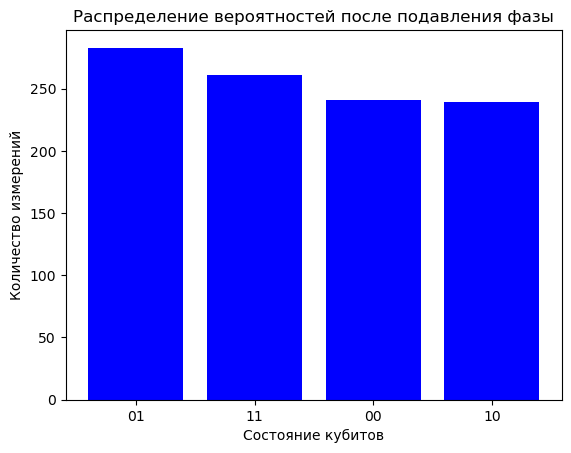

In [48]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
import numpy as np
import matplotlib.pyplot as plt

# Инициализация симулятора
simulator = Aer.get_backend('aer_simulator')

# Создаем квантовую схему с 2 кубитами
qc = QuantumCircuit(2, 2)

# Шаг 1: Создаем суперпозицию всех 4 состояний (H-гейт на каждом кубите)
qc.h(0)
qc.h(1)

# Шаг 2: Добавляем фазовый сдвиг к состоянию |11>
qc.cz(0, 1)  # Контролируемый Z-гейт изменяет фазу |11> на -1 (эквивалентно e^{iπ})
qc.p(np.pi/2, 1)  # Дополнительно сдвигаем фазу только для |11> на e^{iπ/2}

# Шаг 3: Применяем обратную фазовую коррекцию (для подавления сложной фазы)
qc.cz(0, 1)  # Отмена фазового изменения |11>
qc.p(-np.pi/2, 1)  # Инвертируем фазу на e^{-iπ/2}, чтобы вернуться в исходное состояние

# Шаг 4: Измеряем кубиты
qc.measure([0, 1], [0, 1])

# Компиляция схемы
compiled_circuit = transpile(qc, simulator)

# Количество запусков симуляции
shots = 1024

# Запуск симуляции
job = simulator.run(compiled_circuit, shots=shots)
result = job.result()
counts = result.get_counts()

# Вывод результатов
print("Результаты измерений:")
print(counts)

# Визуализация результатов
plt.bar(counts.keys(), counts.values(), color='blue')
plt.xlabel("Состояние кубитов")
plt.ylabel("Количество измерений")
plt.title("Распределение вероятностей после подавления фазы")
plt.show()


Phase = 3.141592653589793
Результаты измерений:
{'11': 512, '01': 512}


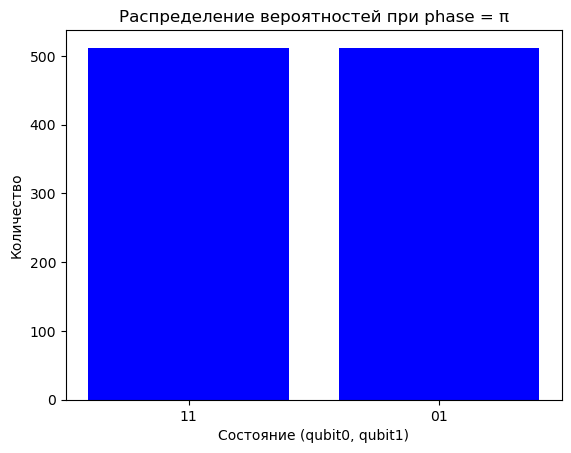

In [71]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
import numpy as np
import matplotlib.pyplot as plt

# Выберем фазу, которая приведёт к полному подавлению состояний с qubit0 = |0⟩.
# Попробуем φ = π.
phase = np.pi  

# Создаем квантовую схему с 2 кубитами и 2 классическими битами
qc = QuantumCircuit(2, 2)

# Шаг 1: Подготавливаем интерференционное состояние.
# Применяем H-гейты ко всем кубитам.
qc.h(0)  # Для кубита, на котором будет интерференция
qc.h(1)  # Для второго кубита, который останется в равномерной суперпозиции

# Сейчас состояние системы:
# |ψ⟩ = (|0⟩ + |1⟩)/√2  ⊗  (|0⟩ + |1⟩)/√2
#     = 1/2 (|00⟩ + |01⟩ + |10⟩ + |11⟩)

# Шаг 2: Применяем фазовый сдвиг только к кубиту 0.
# Фазовый P-гейт действует так: |0⟩ → |0⟩, |1⟩ → e^(iφ)|1⟩.
qc.p(phase, 0)
# Теперь состояния, где кубит0 = |1⟩, получают множитель e^(iπ)= -1.
# Состояние системы становится:
# 1/2 [ |00⟩ + |01⟩ + e^(iπ)|10⟩ + e^(iπ)|11⟩ ]
# 1/2 [ |00⟩ + |01⟩ - |10⟩ - |11⟩ ]

# Шаг 3: Второй H-гейт на кубите 0 для вызова интерференции.
qc.h(0)
# Напомним, что H-гейт действует так:
# H|0⟩ = (|0⟩ + |1⟩)/√2,  H|1⟩ = (|0⟩ - |1⟩)/√2.
#
# Рассмотрим только кубит 0. До H он находится в состоянии:
# 1/√2 (|0⟩ + e^(iπ)|1⟩) = 1/√2 (|0⟩ - |1⟩).
#
# Применив H, получаем:
# H(1/√2(|0⟩ - |1⟩)) = 1/√2 [ (|0⟩+|1⟩)/√2 - (|0⟩-|1⟩)/√2 ]
# = 1/2 [ |0⟩+|1⟩ - |0⟩+|1⟩ ]
# = 1/2 [ 2|1⟩ ] = |1⟩.
#
# Таким образом, кубит 0 переходит в состояние |1⟩ с вероятностью 100%.

# Кубит 1 остаётся в состоянии (|0⟩+|1⟩)/√2, благодаря H-гейту, применённому ранее.

# Итоговое состояние системы:
# |ψ_final⟩ = |1⟩ ⊗ (|0⟩+|1⟩)/√2
# При измерении мы получим:
# - |10⟩ с вероятностью 50%
# - |11⟩ с вероятностью 50%
# При этом исходы |00⟩ и |01⟩ будут подавлены (вероятность ≈ 0).

# Шаг 4: Измеряем кубиты
qc.measure([0, 1], [0, 1])

# Компилируем схему
compiled_circuit = transpile(qc, simulator)

# Запускаем симуляцию
shots = 1024
simulator = Aer.get_backend('aer_simulator')
job = simulator.run(compiled_circuit, shots=shots)
result = job.result()
counts = result.get_counts()

# Выводим результаты
print("Phase =", phase)
print("Результаты измерений:")
print(counts)

# Визуализируем распределение измерений
plt.bar(counts.keys(), counts.values(), color='blue')
plt.xlabel("Состояние (qubit0, qubit1)")
plt.ylabel("Количество")
plt.title("Распределение вероятностей при phase = π")
plt.show()
